# Runtime Correlations

In [78]:
import pandas as pd

In [79]:
#import relevant tables
box_office_mojo = pd.read_csv("./data/bom.movie_gross.csv")

imdb_name = pd.read_csv("./data/name.basics.csv")
imdb_title = pd.read_csv("./data/title.basics.csv")
imdb_crew = pd.read_csv("./data/title.crew.csv") 
imdb_principals = pd.read_csv("./data/title.principals.csv")
imdb_ratings = pd.read_csv("./data/title.ratings.csv")
imdb_akas = pd.read_csv("./data/title.akas.csv")

rt_info = pd.read_csv("./data/rt.movie_info.tsv", sep = "\t")
rt_reviews = pd.read_csv("./data/rt.reviews.tsv", sep = "\t", encoding='windows-1252')

the_movie_db = pd.read_csv("./data/tmdb.movies.csv")

movie_budgets = pd.read_csv("./data/tngross.csv")
movie_production = pd.read_csv("./data/tnproduction.csv")

In [80]:
movie_production

,Unnamed: 0,runtime_minutes,genres,production_company,production_country
0,0,181 minutes,Action,Marvel Studios,United States
1,1,136 minutes,Adventure,Walt Disney Pictures,United States
2,2,141 minutes,Action,Marvel Studios,United States
3,3,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States
4,4,156 minutes,Action,Marvel Studios,United States
...,...,...,...,...,...
6095,6095,90 minutes,Drama,None,United States
6096,6096,88 minutes,Adventure,Phebean Films,Nigeria
6097,6097,None,Documentary,None,United States
6098,6098,None,Horror,None,United States


In [81]:
movie_budgets

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
2,2,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817"
4,4,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,044,540,523"
...,...,...,...,...,...,...
6095,6095,"Mar 17, 2015",Closure,"$100,000",$0,$0
6096,6096,"Aug 29, 2015",Lunch Time Heroes,"$100,000",$0,$0
6097,6097,"Mar 25, 2015",Open Secret,"$100,000",$0,$0
6098,6098,"Nov 10, 2015",The Night Visitor,"$100,000",$0,$0


In [205]:
df = movie_production.merge(movie_budgets, on ="Unnamed: 0")
df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].str.replace(',', '').astype(int)
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').astype(int)

In [200]:
df

,Unnamed: 0,runtime_minutes,genres,production_company,production_country,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,181 minutes,Action,Marvel Studios,United States,"Apr 23, 2019",Avengers: Endgame,400000000,"$858,373,000",2797800564
1,1,136 minutes,Adventure,Walt Disney Pictures,United States,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,"$241,071,802",1045713802
2,2,141 minutes,Action,Marvel Studios,United States,"Apr 22, 2015",Avengers: Age of Ultron,365000000,"$459,005,868",1395316979
3,3,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2064615817
4,4,156 minutes,Action,Marvel Studios,United States,"Apr 25, 2018",Avengers: Infinity War,300000000,"$678,815,482",2044540523
...,...,...,...,...,...,...,...,...,...,...
6095,6095,90 minutes,Drama,None,United States,"Mar 17, 2015",Closure,100000,$0,0
6096,6096,88 minutes,Adventure,Phebean Films,Nigeria,"Aug 29, 2015",Lunch Time Heroes,100000,$0,0
6097,6097,None,Documentary,None,United States,"Mar 25, 2015",Open Secret,100000,$0,0
6098,6098,None,Horror,None,United States,"Nov 10, 2015",The Night Visitor,100000,$0,0


In [242]:
df = df[(df['runtime_minutes'] != 'None')]

df

,Unnamed: 0,runtime_minutes,genres,production_company,production_country,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
6013,6013,93,Action,Roadshow Films,Australia,"Apr 12, 1979",Mad Max,200000,"$8,750,000",99750000,498.750000
5882,5882,96,Horror,"Blumhouse, Solana Films",United States,"Sep 25, 2009",Paranormal Activity,450000,"$107,918,810",194183034,431.517853
6080,6080,81,Horror,"New Line Cinema, Blumhouse, Tremendum Pictures...",United States,"Jul 9, 2015",The Gallows,100000,"$22,764,410",41656474,416.564740
5794,5794,81,Horror,None,United States,"Jul 14, 1999",The Blair Witch Project,600000,"$140,539,099",248300000,413.833333
5728,5728,70,Adventure,Walt Disney Animation Studios,United States,"Aug 13, 1942",Bambi,858000,"$102,797,000",268000000,312.354312
...,...,...,...,...,...,...,...,...,...,...,...
3160,3160,86,Comedy,"MRC, 3 Arts Entertainment, Quinnâs House",United States,"May 22, 2020",The Lovebirds,16000000,$0,0,0.000000
1634,1634,98,Adventure,"Aniventure, Atresmedia Cine, Netflix Animation...",Spain,"Nov 8, 2019",Klaus,40000000,$0,0,0.000000
1635,1635,101,Horror,Warner Bros.,United States,"Aug 25, 2017",Death Note,40000000,$0,0,0.000000
5867,5867,122,Action,None,United States,"Mar 10, 2015",Subconscious,500000,$0,0,0.000000


In [202]:
df['runtime_minutes'] = df['runtime_minutes'].str.replace('minutes', '')
df['runtime_minutes'] = df['runtime_minutes'].astype(int)

,Unnamed: 0,runtime_minutes,genres,production_company,production_country,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,181 minutes,Action,Marvel Studios,United States,"Apr 23, 2019",Avengers: Endgame,400000000,"$858,373,000",2797800564
1,1,136 minutes,Adventure,Walt Disney Pictures,United States,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,"$241,071,802",1045713802
2,2,141 minutes,Action,Marvel Studios,United States,"Apr 22, 2015",Avengers: Age of Ultron,365000000,"$459,005,868",1395316979
3,3,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2064615817
4,4,156 minutes,Action,Marvel Studios,United States,"Apr 25, 2018",Avengers: Infinity War,300000000,"$678,815,482",2044540523
...,...,...,...,...,...,...,...,...,...,...
6090,6090,90 minutes,Documentary,Oscilloscope Pictures,United States,"Jun 19, 2014",The Past is a Grotesque Animal,100000,"$20,056",20056
6093,6093,82 minutes,Adventure,None,United States,Unknown,"Dude, Where's My Dog",100000,$0,0
6095,6095,90 minutes,Drama,None,United States,"Mar 17, 2015",Closure,100000,$0,0
6096,6096,88 minutes,Adventure,Phebean Films,Nigeria,"Aug 29, 2015",Lunch Time Heroes,100000,$0,0


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 6099
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          4995 non-null   int64 
 1   runtime_minutes     4995 non-null   int64 
 2   genres              4995 non-null   object
 3   production_company  4995 non-null   object
 4   production_country  4995 non-null   object
 5   release_date        4995 non-null   object
 6   movie               4995 non-null   object
 7   production_budget   4995 non-null   int64 
 8   domestic_gross      4995 non-null   object
 9   worldwide_gross     4995 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 429.3+ KB


In [217]:
df['profit'] =  df['worldwide_gross'] / df['production_budget']

In [224]:
df = df.sort_values(by=['profit'], ascending=False)
df

,Unnamed: 0,runtime_minutes,genres,production_company,production_country,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
6013,6013,93,Action,Roadshow Films,Australia,"Apr 12, 1979",Mad Max,200000,"$8,750,000",99750000,498.750000
5882,5882,96,Horror,"Blumhouse, Solana Films",United States,"Sep 25, 2009",Paranormal Activity,450000,"$107,918,810",194183034,431.517853
6080,6080,81,Horror,"New Line Cinema, Blumhouse, Tremendum Pictures...",United States,"Jul 9, 2015",The Gallows,100000,"$22,764,410",41656474,416.564740
5794,5794,81,Horror,None,United States,"Jul 14, 1999",The Blair Witch Project,600000,"$140,539,099",248300000,413.833333
5728,5728,70,Adventure,Walt Disney Animation Studios,United States,"Aug 13, 1942",Bambi,858000,"$102,797,000",268000000,312.354312
...,...,...,...,...,...,...,...,...,...,...,...
3160,3160,86,Comedy,"MRC, 3 Arts Entertainment, Quinnâs House",United States,"May 22, 2020",The Lovebirds,16000000,$0,0,0.000000
1634,1634,98,Adventure,"Aniventure, Atresmedia Cine, Netflix Animation...",Spain,"Nov 8, 2019",Klaus,40000000,$0,0,0.000000
1635,1635,101,Horror,Warner Bros.,United States,"Aug 25, 2017",Death Note,40000000,$0,0,0.000000
5867,5867,122,Action,None,United States,"Mar 10, 2015",Subconscious,500000,$0,0,0.000000


In [267]:
correlation = df['runtime_minutes'].corr(df['profit'])
correlation

-0.0210064134893255

In [228]:
profitable = df[df['profit'] >= 1]
non_profitable = df[df['profit'] < 1]

In [268]:
profitable.describe()

,Unnamed: 0,runtime_minutes,production_budget,worldwide_gross,profit
count,3456.000000,3456.000000,3.456000e+03,3.456000e+03,3456.000000
mean,2583.715567,110.286169,4.173212e+07,1.532401e+08,6.506777
std,1708.101643,20.337115,4.927727e+07,2.201779e+08,20.213430
min,0.000000,41.000000,1.000000e+05,1.105360e+05,1.000265
25%,1073.500000,96.000000,9.500000e+06,3.132758e+07,1.895467
50%,2395.000000,107.000000,2.500000e+07,7.700959e+07,3.120961
75%,3994.500000,121.000000,5.500000e+07,1.802631e+08,5.453992
max,6088.000000,248.000000,4.000000e+08,2.845900e+09,498.750000


In [229]:
non_profitable

,Unnamed: 0,runtime_minutes,genres,production_company,production_country,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
458,458,135,Drama,Wingnut Films,"New Zealand, United Kingdom, United States","Dec 11, 2009",The Lovely Bones,95000000,"$44,114,232",94894448,0.998889
1438,1438,90,Comedy,"Mosaic Media, Gary Sanchez Productions, Columb...",United States,"Dec 20, 2018",Holmes & Watson,42000000,"$30,568,743",41926605,0.998252
782,782,122,Thriller/Suspense,"Village Roadshow Productions, Silver Pictures,...","Australia, United States","Sep 14, 2007",The Brave One,70000000,"$36,793,804",69792704,0.997039
1221,1221,119,Comedy,"Touchstone Pictures, Beacon Pictures, Mandevil...",United States,"May 28, 2004",Raising Helen,50000000,"$37,485,528",49842431,0.996849
1938,1938,101,Drama,None,None,"Sep 28, 2001",Hearts in Atlantis,31000000,"$24,185,781",30885781,0.996316
...,...,...,...,...,...,...,...,...,...,...,...
3160,3160,86,Comedy,"MRC, 3 Arts Entertainment, Quinnâs House",United States,"May 22, 2020",The Lovebirds,16000000,$0,0,0.000000
1634,1634,98,Adventure,"Aniventure, Atresmedia Cine, Netflix Animation...",Spain,"Nov 8, 2019",Klaus,40000000,$0,0,0.000000
1635,1635,101,Horror,Warner Bros.,United States,"Aug 25, 2017",Death Note,40000000,$0,0,0.000000
5867,5867,122,Action,None,United States,"Mar 10, 2015",Subconscious,500000,$0,0,0.000000


,Unnamed: 0,runtime_minutes,production_budget,worldwide_gross,profit
count,1317.000000,1317.000000,1.317000e+03,1.317000e+03,1317.000000
mean,3074.509491,106.750949,2.655159e+07,1.454946e+07,0.426561
std,1602.528596,18.502450,2.869145e+07,2.219965e+07,0.319303
min,72.000000,59.000000,1.000000e+05,1.700000e+01,0.000002
25%,1717.000000,94.000000,7.000000e+06,6.857800e+05,0.117508
50%,2998.000000,103.000000,1.800000e+07,6.200000e+06,0.390211
75%,4331.000000,116.000000,3.600000e+07,1.882158e+07,0.716541
max,6090.000000,260.000000,2.000000e+08,1.741313e+08,0.998889


In [270]:
#removing rows where worldwide gross = 0
non_profitable = non_profitable[(non_profitable['worldwide_gross'] != 0)]

In [271]:
non_profitable.describe()

,Unnamed: 0,runtime_minutes,production_budget,worldwide_gross,profit
count,1317.000000,1317.000000,1.317000e+03,1.317000e+03,1317.000000
mean,3074.509491,106.750949,2.655159e+07,1.454946e+07,0.426561
std,1602.528596,18.502450,2.869145e+07,2.219965e+07,0.319303
min,72.000000,59.000000,1.000000e+05,1.700000e+01,0.000002
25%,1717.000000,94.000000,7.000000e+06,6.857800e+05,0.117508
50%,2998.000000,103.000000,1.800000e+07,6.200000e+06,0.390211
75%,4331.000000,116.000000,3.600000e+07,1.882158e+07,0.716541
max,6090.000000,260.000000,2.000000e+08,1.741313e+08,0.998889


In [272]:
#mean runtimes of profitable and non-profitable
avg_runtime_profitable = profitable['runtime_minutes'].mean().round(2)
avg_runtime_non_profitable = non_profitable['runtime_minutes'].mean().round(2)

print(f'The mean runtime of profitable movies is {avg_runtime_profitable} minutes.')
print(f'The mean runtime of non-profitable movies is {avg_runtime_non_profitable} minutes.')

The mean runtime of profitable movies is 110.29 minutes.
The mean runtime of non-profitable movies is 106.75 minutes.


In [273]:
#median runtimes of profitable and non-profitable
median_runtime_profitable = profitable['runtime_minutes'].median().round(2)
median_runtime_non_profitable = non_profitable['runtime_minutes'].median().round(2)

print(f'The median runtime of profitable movies is {median_runtime_profitable} minutes.')
print(f'The median runtime of non-profitable movies is {median_runtime_non_profitable} minutes.')

The median runtime of profitable movies is 107.0 minutes.
The median runtime of non-profitable movies is 103.0 minutes.


In [275]:
import matplotlib.pyplot as plt
%matplotlib inline

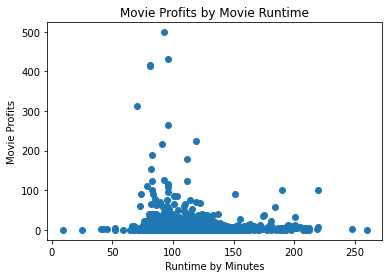

In [276]:
fig, ax = plt.subplots()

ax.scatter(x = df['runtime_minutes'], y = df['profit'])
ax.set_title('Movie Profits by Movie Runtime')
ax.set_xlabel('Runtime by Minutes')
ax.set_ylabel('Movie Profits');

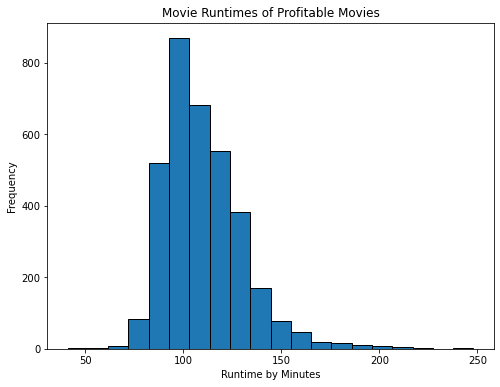

In [277]:
import numpy as np

fig, ax = plt.subplots(figsize = (8,6))

x=profitable['runtime_minutes']


ax.hist(x, edgecolor="black", bins=20)
ax.set_title('Movie Runtimes of Profitable Movies')
ax.set_xlabel('Runtime by Minutes')
ax.set_ylabel('Frequency');

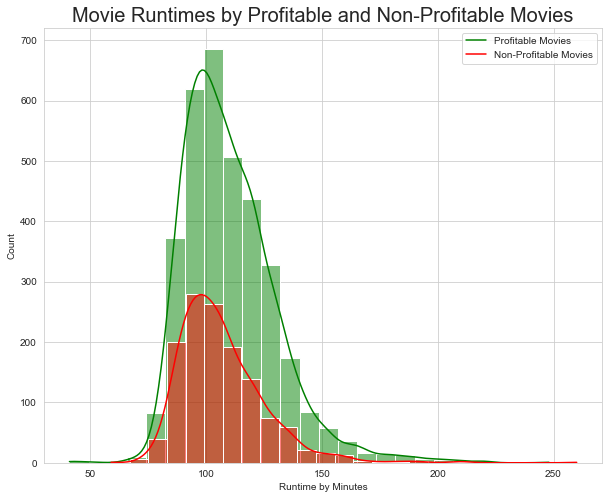

In [324]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,8))
sns.set_style("whitegrid") 
sns.histplot(data=profitable, x="runtime_minutes", color="green", bins=25, kde=True)
plt.xlabel("Runtime by Minutes")
plt.title("Movie Runtimes by Profitable and Non-Profitable Movies", size=20)

sns.histplot(data=non_profitable, x="runtime_minutes", color="red", alpha  = 0.5, bins=25, kde=True)
plt.legend(labels=["Profitable Movies","Non-Profitable Movies"]);

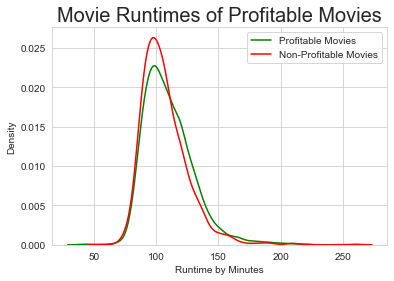

In [313]:
sns.set_style("whitegrid") 
sns.kdeplot(data=profitable, x="runtime_minutes", color="green")
sns.kdeplot(data=non_profitable, x="runtime_minutes", color="red")
plt.xlabel("Runtime by Minutes")
plt.title("Movie Runtimes of Profitable Movies", size=20)

plt.legend(labels=["Profitable Movies","Non-Profitable Movies"]);

In [411]:
genre_df = df.groupby('genres').apply(lambda x: x.sort_values(by ='profit', ascending = False))

In [412]:
genre_df.rename({'genres': 'genre_category'}, axis=1, inplace=True)

In [413]:
genre_df.value_counts('genre_category')

genre_category
Drama                  1280
Comedy                  809
Action                  683
Adventure               658
Thriller/Suspense       532
Horror                  423
Romantic Comedy         210
Documentary              93
Black Comedy             90
Musical                  87
Western                  69
None                     46
Concert/Performance      13
Multiple Genres           2
dtype: int64

In [443]:
genre_df = genre_df.loc[genre_df['genre_category'] != 'Concert/Performance']
genre_df = genre_df.loc[genre_df['genre_category'] != 'None']
genre_df = genre_df.loc[genre_df['genre_category'] != 'Multiple Genres']
genre_df = genre_df.loc[genre_df['worldwide_gross'] != 0]


In [449]:
genre_df.groupby(['genre_category'])['profit'].median()


genre_category
Action               2.218164
Adventure            2.623640
Black Comedy         1.769962
Comedy               2.101734
Documentary          1.330743
Drama                1.730852
Horror               3.316691
Musical              2.624576
Romantic Comedy      2.642526
Thriller/Suspense    1.753237
Western              1.439160
Name: profit, dtype: float64

In [450]:
genre_df.groupby(['genre_category'])['profit'].mean()

genre_category
Action                3.926018
Adventure             4.298659
Black Comedy          2.986744
Comedy                3.724391
Documentary           6.583380
Drama                 4.223643
Horror               12.697377
Musical               8.248880
Romantic Comedy       4.140978
Thriller/Suspense     3.152935
Western               4.874936
Name: profit, dtype: float64

In [461]:
horror = genre_df[(genre_df['genre_category'] == 'Horror')]
horror.head(50)

Unnamed: 0  runtime_minutes genre_category  \
genres                                                    
Horror 5882        5882               96         Horror   
       6080        6080               81         Horror   
       5794        5794               81         Horror   
       6077        6077               96         Horror   
       5930        5930               91         Horror   
       6066        6066               83         Horror   
       5812        5812               96         Horror   
       5584        5584               83         Horror   
       5964        5964               96         Horror   
       5528        5528              103         Horror   
       5918        5918               85         Horror   
       6082        6082               89         Horror   
       5429        5429              101         Horror   
       5586        5586               82         Horror   
       5001        5001               91         Horror   
       4551        4551              104         Horror   
       5589        5589               93         Horror   
       4552        4552               81         Horror   
       4356        4356               98         Horror   
       3543        3543              124         Horror   
       5379        5379              100         Horror   
       5442        5442              126         Horror   
       5782        5782               88         Horror   
       3544        3544              121         Horror   
       5819        5819               95         Horror   
       4554        4554              105         Horror   
       4013        4013              116         Horror   
       5003        5003               85         Horror   
       4555        4555               80         Horror   
       5005        5005              110         Horror   
       5921        5921               88         Horror   
       4558        4558               87         Horror   
       5588        5588               94         Horror   
       5565        5565               99         Horror   
       3751        3751              105         Horror   
       4557        4557               96         Horror   
       4559        4559               89         Horror   
       3185        3185              109         Horror   
       5431        5431               94         Horror   
       1723        1723              135         Horror   
       4257        4257              124         Horror   
       4827        4827              105         Horror   
       4556        4556               94         Horror   
       3033        3033               95         Horror   
       5564        5564               89         Horror   
       3753        3753               92         Horror   
       4570        4570               84         Horror   
       5590        5590               91         Horror   
       5519        5519               87         Horror   
       5128        5128              111         Horror   

                                            production_company  \
genres                                                           
Horror 5882                            Blumhouse, Solana Films   
       6080  New Line Cinema, Blumhouse, Tremendum Pictures...   
       5794                                               None   
       6077                                               None   
       5930                                               None   
       6066                                               None   
       5812     Paramount Pictures, Georgetown Productions Inc   
       5584                        Insurge Pictures, Prototype   
       5964                                               None   
       5528                                               None   
       5918                                               None   
       6082                                               None   
       5429         

In [ ]:
top_5_genres_by_medianprofit = genre_df
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Black Comedy']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Comedy']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Documentary']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Drama']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Thriller/Suspense']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Western']
top_5_genres_by_medianprofit.value_counts('genre_category')

In [470]:
top_5_genres_by_medianprofit.describe()

,Unnamed: 0,runtime_minutes,production_budget,worldwide_gross,profit
count,1968.000000,1968.000000,1.968000e+03,1.968000e+03,1968.000000
mean,2107.446646,107.389736,5.668187e+07,1.864949e+08,6.015806
std,1675.746210,19.609560,5.815109e+07,2.644504e+08,24.231240
min,0.000000,52.000000,1.000000e+05,1.700000e+01,0.000002
25%,609.750000,93.000000,1.400000e+07,2.868970e+07,1.273411
50%,1757.000000,103.000000,3.500000e+07,8.743651e+07,2.618592
75%,3373.500000,118.000000,8.000000e+07,2.374813e+08,4.686098
max,6082.000000,212.000000,4.000000e+08,2.845900e+09,498.750000


In [469]:
top_5_genres_by_medianprofit.groupby(['genre_category'])['runtime_minutes'].mean()


genre_category
Action             114.915515
Adventure          104.384858
Horror              98.949622
Musical            116.222222
Romantic Comedy    105.639024
Name: runtime_minutes, dtype: float64

In [558]:
for_graph = top_5_genres_by_medianprofit.groupby(['genre_category'])['runtime_minutes'].median()
for_graph

genre_category
Action             112
Adventure           99
Horror              96
Musical            113
Romantic Comedy    104
Name: runtime_minutes, dtype: int64

In [559]:
x = for_graph.index
x

Index(['Action', 'Adventure', 'Horror', 'Musical', 'Romantic Comedy'], dtype='object', name='genre_category')

In [560]:
y = for_graph.tolist()[0:5]
y

[112, 99, 96, 113, 104]

In [545]:
top_5_genres_by_medianprofit['runtime_minutes'].median()

103.0

In [500]:
top_5_genres_by_medianprofit['runtime_minutes'].mean()

107.38973577235772

In [505]:
correlation_top_genres = top_5_genres_by_medianprofit['runtime_minutes'].corr(top_5_genres_by_medianprofit['profit'])
correlation_top_genres

-0.06541856717104048

Text(0.5, 1.0, 'Median Runtime of Movies by Top 5 Profitable Genres')

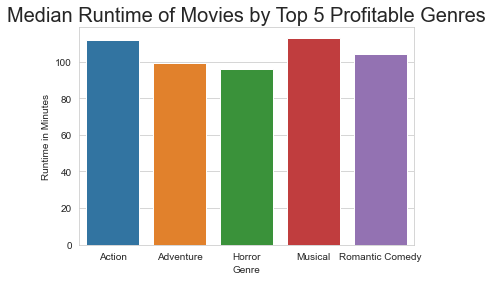

In [564]:
# x=top_5_genres_by_medianprofit['genre_category']
# y=top_5_genres_by_medianprofit['genre_category']
# top_5_genres_by_medianprofit.sort_values('runtime_minutes')

sns.barplot(x=for_graph.index, y=for_graph.values)
plt.xlabel("Genre")
plt.ylabel("Runtime in Minutes")
plt.title("Median Runtime of Movies by Top 5 Profitable Genres", size=20)
            